<Axes: xlabel='x'>

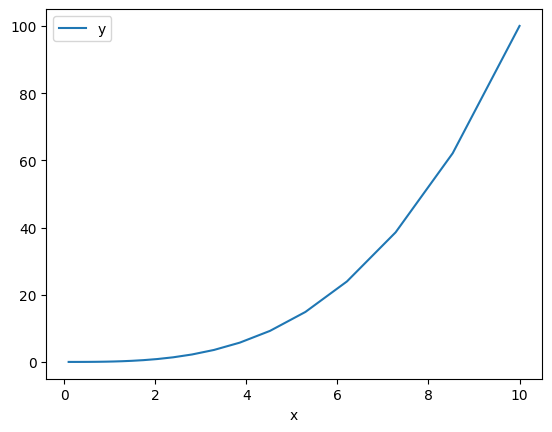

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame({"x": np.logspace(-1, 1, 30, base=10)})
df["y"] = 0.1 * np.power(df["x"], 3)
df.plot(x="x", style=["-", "--"])

<Axes: xlabel='x'>

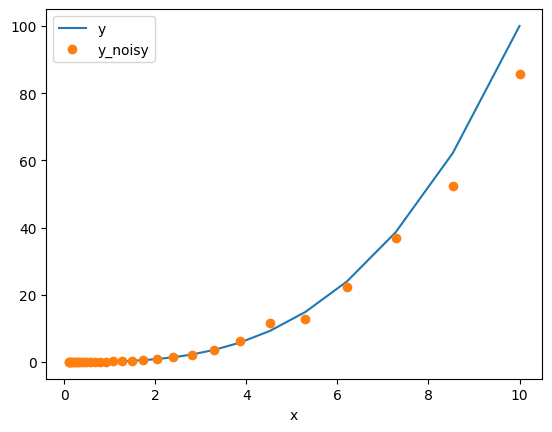

In [2]:
# Add 10% noise to y
df["y_noisy"] = df["y"] * (1 + 0.1 * np.random.randn(len(df)))
df.plot(x="x", style=["-", "o"])

In [3]:
# Save the data to the data folder
df.to_csv("../ezfit/data/powerlaw.csv", index=False)
df.to_csv("../data/lab1/powerlaw.csv", index=False)

In [ ]:
time = np.arange(0, 10, 0.5)
df_V = pd.DataFrame(
    {
        "time": time,
        "voltage": np.sin(time),
    }
)
df_I = pd.DataFrame(
    {
        "time": time + 0.2,
        "current": np.cos(time + 0.2),
    }
)

df_V.to_csv("../ezfit/data/voltage_data.csv", index=False)
df_I.to_csv("../ezfit/data/current_data.csv", index=False)

In [65]:
from ezfit import load_dataset

# --------------------------------------------------------------
# 2.  Load data into pandas
# --------------------------------------------------------------
df_V = load_dataset("voltage_data.csv")
df_I = load_dataset("current_data.csv")

display(df_V.head())
display(df_I.head())

,time,voltage
0,0.0,0.000000
1,0.5,0.479426
2,1.0,0.841471
3,1.5,0.997495
4,2.0,0.909297


,time,current
0,0.2,0.980067
1,0.7,0.764842
2,1.2,0.362358
3,1.7,-0.128844
4,2.2,-0.588501


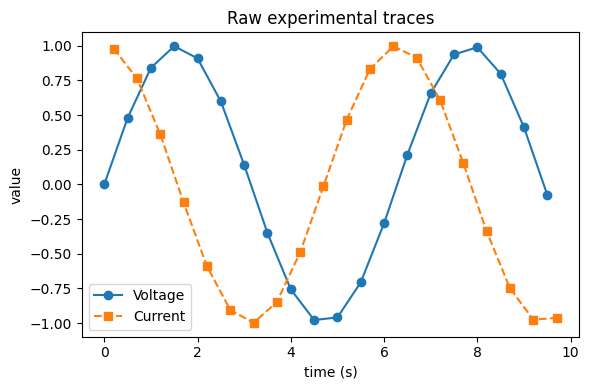

In [66]:
# --------------------------------------------------------------
# 3.  Plot the raw data
# --------------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(df_V["time"], df_V["voltage"], "o-", label="Voltage")
plt.plot(df_I["time"], df_I["current"], "s--", label="Current")
plt.xlabel("time (s)")
plt.ylabel("value")
plt.legend()
plt.title("Raw experimental traces")
plt.tight_layout()
plt.show()

In [ ]:
# --------------------------------------------------------------
# 4.  Define a common time axis & interpolate
# --------------------------------------------------------------
# Common grid
t_common = np.arange(0, df_V["time"].max(), 0.5)

# Interpolate voltage and current onto the common grid
V_common = np.interp(t_common, df_V["time"], df_V["voltage"])
I_common = np.interp(t_common, df_I["time"], df_I["current"])
# --------------------------------------------------------------
# 5.  Compute a derived quantity – instantaneous power
# --------------------------------------------------------------
P_common = V_common * I_common  # P(t) = V(t) * I(t)

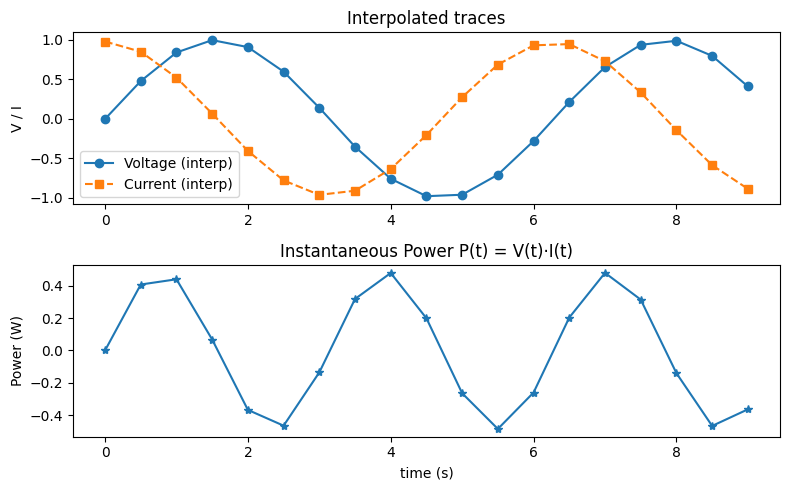

In [70]:
# --------------------------------------------------------------
# 6.  Plot the interpolated data and the computed power
# --------------------------------------------------------------
plt.figure(figsize=(8, 5))

plt.subplot(2, 1, 1)
plt.plot(t_common, V_common, "o-", label="Voltage (interp)")
plt.plot(t_common, I_common, "s--", label="Current (interp)")
plt.ylabel("V / I")
plt.title("Interpolated traces")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_common, P_common, "*-")
plt.xlabel("time (s)")
plt.ylabel("Power (W)")
plt.title("Instantaneous Power P(t) = V(t)·I(t)")

plt.tight_layout()
plt.show()